# FOM Convergence Analysis

In [1]:
import analysis.core as core
import analysis.fom as fom
import numpy as np
import matplotlib.pyplot as plt
import cPickle
import pandas as pd
import re
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [2]:
def plot_setup(xlabel, ylabel, title, font=12):
    plt.figure(figsize=(12, 9))
    ax = plt.subplot(111)  
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.ylabel(ylabel,fontsize=font)
    plt.xlabel(xlabel,fontsize=font)
    plt.title(title, y=1.08, fontsize = font)
    #plt.rc('grid', linestyle="--", color='gray')
    plt.grid('on')

# Convergence Sample Graphs

In [4]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = [0.2]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
pwr_comp = fom.Comparator(dir,name)

Uploaded 630 files.


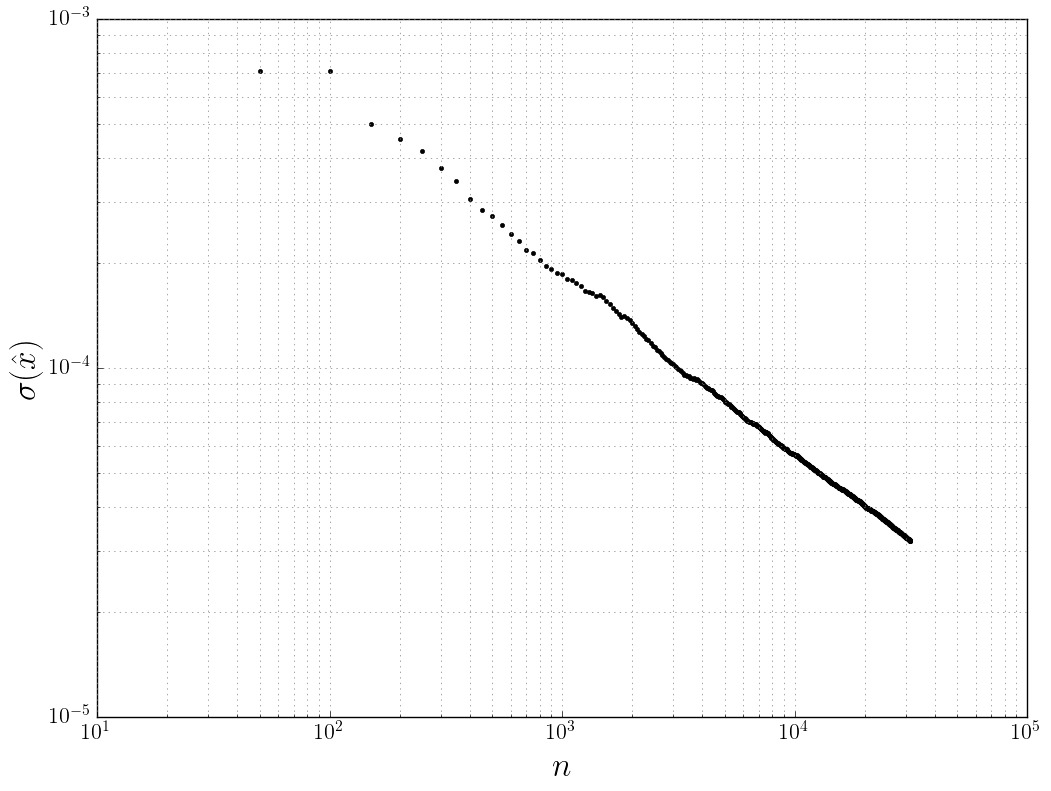

In [52]:
label = 'INF_FLX'
grp = 1
pts = 50
font_size = 16
label_size = 24
pwr_comp.plot(label, grp, fom=False)
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
ax = plt.gca()
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('$\sigma(\hat{x})$', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/error_convergence.pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

------------------_

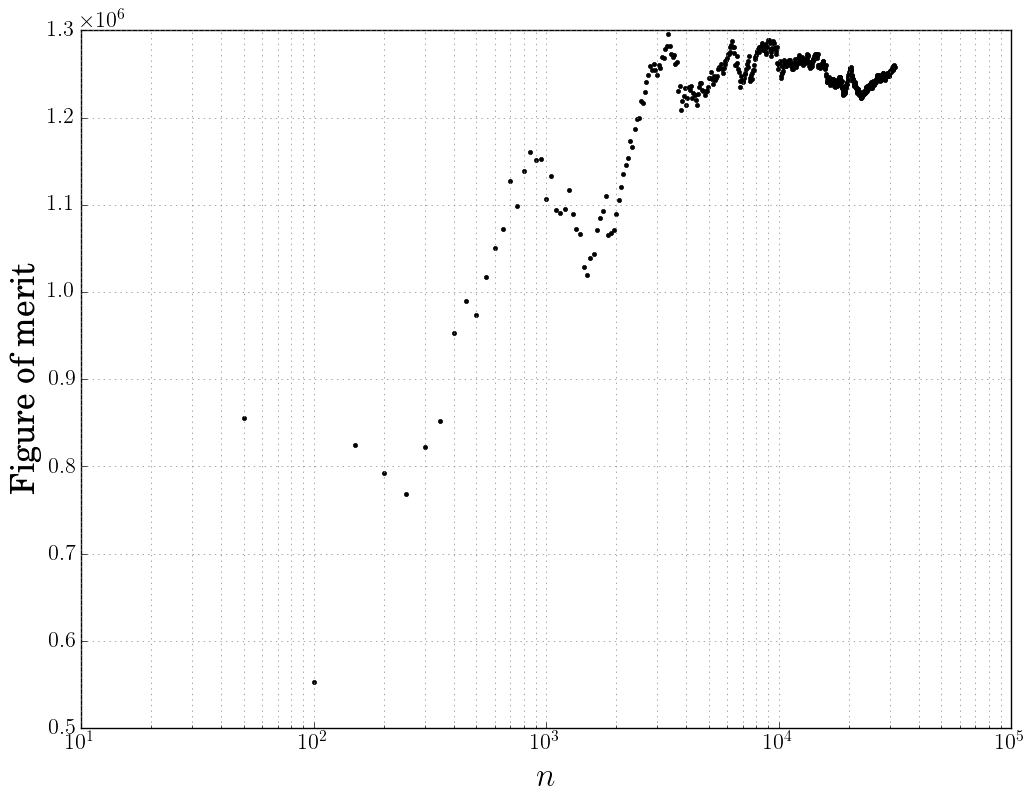

In [53]:
label = 'INF_FLX'
file_name = 'fom_convergence_example'
grp = 1
pts = 50
font_size = 16
label_size= 24
pwr_comp.plot(label, grp, fom=True)
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

---------------_
# Test case plotting

## PWR

In [26]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
pwr_comp = fom.Comparator(dir,name)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 1058 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


In [72]:
label = 'INF_SP0'
grp = 1
n_pts = 20
r_names, ratio = pwr_comp.ratio(label,grp,n_pts)
d_names = [a.name for a in pwr_comp.data]
fom   = [a.get_avg(label,grp,n_pts) for a in pwr_comp.data]
d = {'twdt' : r_names, 'fom' : fom, 'ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
df = df[cols]
print df
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x
print df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False)

  twdt           fom     ratio
0  0.1  1.467242e+07  1.000000
1  0.2  1.407526e+07  0.959300
2  0.3  1.404113e+07  0.956974
3  0.4  1.419632e+07  0.967552
4  0.5  1.155054e+07  0.787228
5  0.6  1.181301e+07  0.805117
6  0.7  1.191133e+07  0.811818
7  0.8  1.188149e+07  0.809784
8  0.9  1.212526e+07  0.826398
9  1.0  1.199368e+07  0.817430
\begin{tabular}{lrr}
\toprule
twdt &                     fom &    ratio \\
\midrule
 0.1 & 1.467242$\times 10^{7}$ & 1.000000 \\
 0.2 & 1.407526$\times 10^{7}$ & 0.959300 \\
 0.3 & 1.404113$\times 10^{7}$ & 0.956974 \\
 0.4 & 1.419632$\times 10^{7}$ & 0.967552 \\
 0.5 & 1.155054$\times 10^{7}$ & 0.787228 \\
 0.6 & 1.181301$\times 10^{7}$ & 0.805117 \\
 0.7 & 1.191133$\times 10^{7}$ & 0.811818 \\
 0.8 & 1.188149$\times 10^{7}$ & 0.809784 \\
 0.9 & 1.212526$\times 10^{7}$ & 0.826398 \\
 1.0 & 1.199368$\times 10^{7}$ & 0.817430 \\
\bottomrule
\end{tabular}



In [79]:
np.mean(df['ratio'][1:5])

0.9177636932570608

--------------_

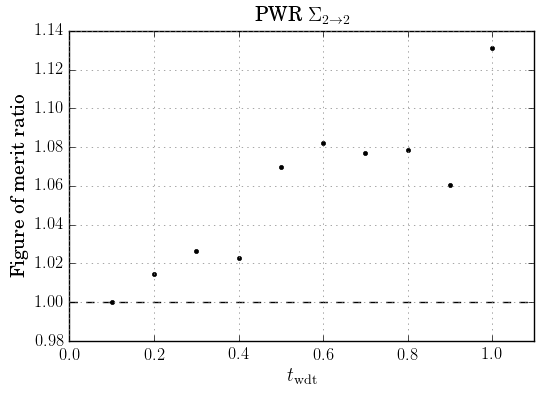

In [119]:
label = 'INF_SP0'
grp = 4
file_name = 'pwr_' + label.lower() + '_grp_' + str(grp)
n_pts = 20
names, ratio = pwr_comp.ratio(label,grp,n_pts)
#names, ratio2 = pwr_comp.ratio(label,grp+1,n_pts)
font_size = 12
label_size= 14
plt.plot(x_pwr,ratio,'ko',markersize=6, label='Group 1')
#plt.plot(x_pwr,ratio2,'kx',ms=6, mew=1.5,label='Group 2')
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
plt.xlim([0,1.1])
#plt.ylim([0.99,1.07])
plt.axhline(y=1.0, color='k',linestyle='--')
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit ratio', fontsize=label_size)
plt.xlabel('$t_{\mathrm{wdt}}$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=1.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('PWR $\Sigma_{2 \\to 2}$')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()


In [82]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = [0.1, 0.9]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
full_comp = fom.Comparator(dir,name)

Uploaded 1450 files.
Uploaded 1002 files.


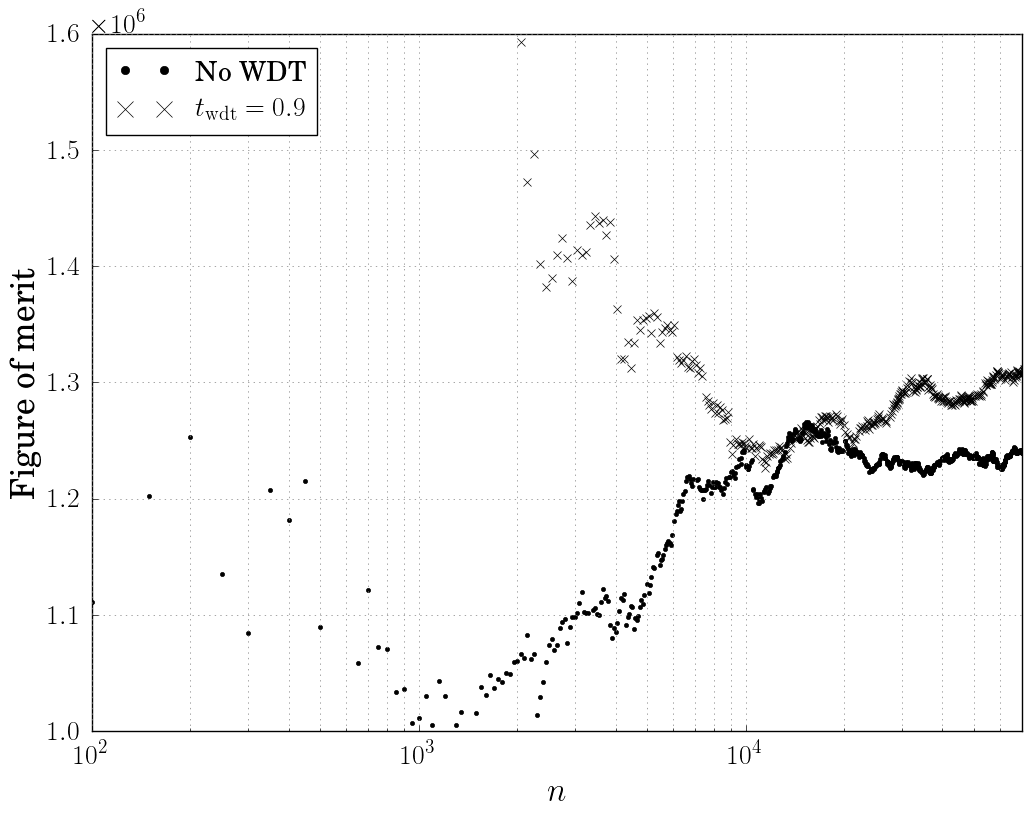

In [99]:
label = 'INF_FLX'
file_name = 'pwr_inf_flx_nowdt_09_grp1'
grp = 1
pts = 20
font_size = 20
label_size= 24
full_comp.plot(label, grp, fom=True)
plt.ylim([1e6,1.6e6])
plt.xlim([1e2,7e4])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size, pad = 8)
ax.tick_params(axis='x', labelsize=font_size, pad = 8)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
line.set_markevery(0.2)
line = plt.gca().get_lines()[1]
line.set_marker('x') 
line.set_color('black')
line.set_markevery(0.2)
L = plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('$t_{\mathrm{wdt}} = 0.9$')
#L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')

## Fast Pin Cell

In [3]:
base = '/home/josh/downloads/scratch/fast_pincell/S0100/'
x_fast = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_fast]
name = [str(n) for n in x_fast]
fast_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 486 files.
Uploaded 660 files.
Uploaded 465 files.
Uploaded 420 files.
Uploaded 784 files.
Uploaded 362 files.
Uploaded 366 files.
Uploaded 437 files.
Uploaded 492 files.


### Create Data Tables

In [89]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
labels = ['INF_FLX','INF_TOT']
grps = [1,2]
n_pts = 20

for label in labels:
    for grp in grps:
        r_names, ratio = fast_comp.ratio(label,grp,n_pts)
        d_names = [a.name for a in fast_comp.data]
        fom   = [a.get_avg(label,grp,n_pts) for a in fast_comp.data]
        d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
        df = pd.DataFrame(d)
        cols = df.columns.tolist()
        cols = [cols[1], cols[0], cols[2]]
        df = df[cols]
        def fom(x):
            return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
        def ratio(x):
            return '{:.6f}'.format(x)
        def twdt(x):
            return x
        file_name = 'fast_' + label.lower() + '_grp_' + str(grp) + '.tex'
        with open(base_dir + file_name,'w') as f:
            f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))

## Create Plots

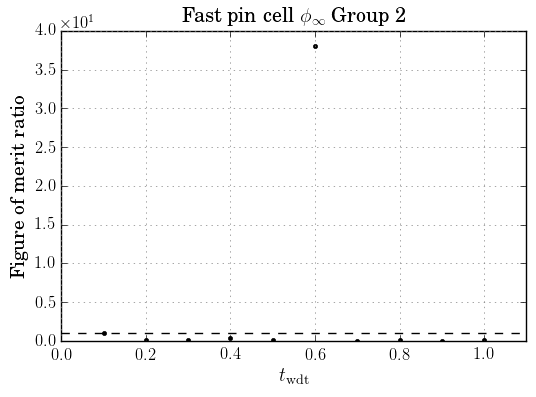

In [8]:
label = 'INF_TOT'
grp = 2
file_name = 'fast_' + label.lower() + '_grp_' + str(grp)
n_pts = 20
names, ratio = fast_comp.ratio(label,grp,n_pts)
font_size = 12
label_size= 14
plt.plot(x_fast,ratio,'ko',markersize=6, label='Group 1')
#plt.plot(x_pwr,ratio2,'kx',ms=6, mew=1.5,label='Group 2')
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
plt.xlim([0,1.1])
#plt.ylim([0.99,1.07])
plt.axhline(y=1.0, color='k',linestyle='--')
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit ratio', fontsize=label_size)
plt.xlabel('$t_{\mathrm{wdt}}$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=1.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('Fast pin cell $\phi_{\infty}$ Group 2')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

In [16]:
base = '/home/josh/downloads/scratch/fast_pincell/S0100/'
x_part = [0.1, 0.6]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_part]
name = [str(n) for n in x_part]
fast_part_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 784 files.


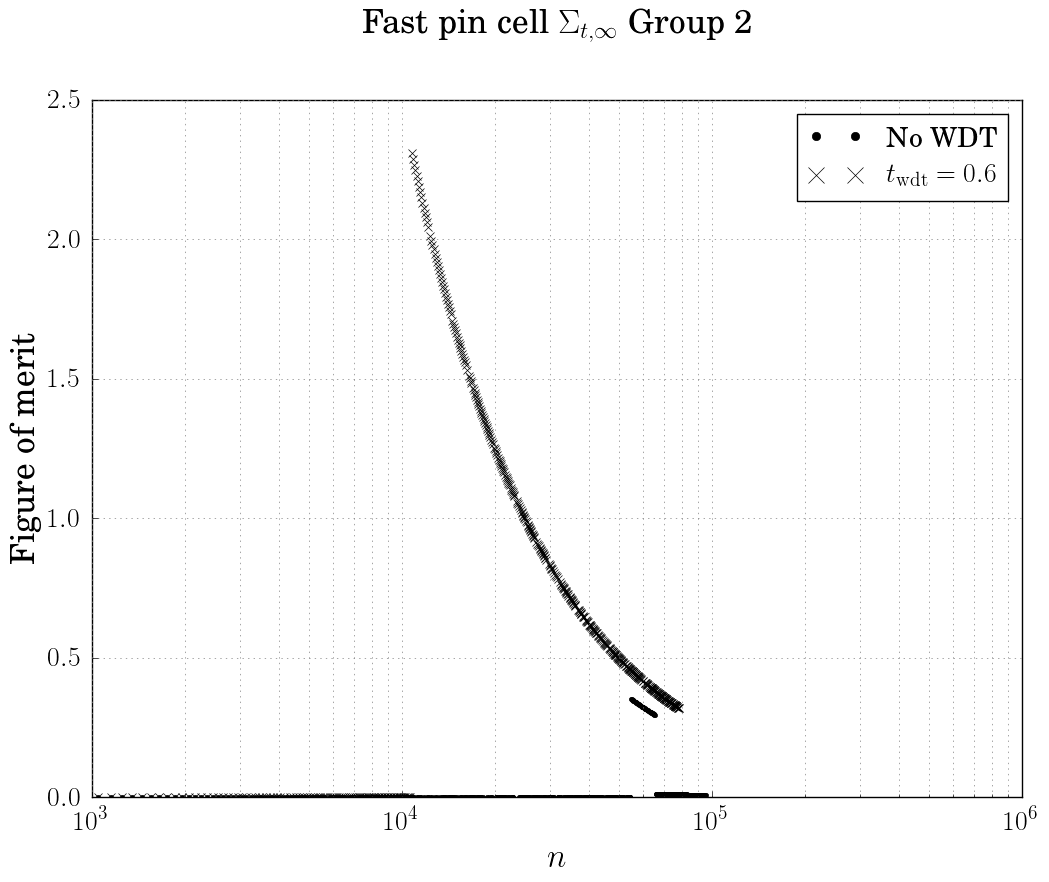

In [17]:
label = 'INF_TOT'
file_name = 'fast_inf_tot_example'
grp = 2
pts = 20
font_size = 20
label_size= 24

fast_part_comp.plot(label, grp, fom=True)

#plt.ylim([10e-1, 2e0])
plt.xlim([1e3,1e6])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size, pad = 8)
ax.tick_params(axis='x', labelsize=font_size, pad = 8)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
line.set_markevery(0.2)
line = plt.gca().get_lines()[1]
line.set_marker('x') 
line.set_color('black')
line.set_markevery(0.2)

L = plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('$t_{\mathrm{wdt}} = 0.6$')
#L.set_visible(False)
plt.grid(True,which='both',color='0.5')
plt.title('Fast pin cell $\Sigma_{t,\infty}$ Group 2')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

# Homogenous Fuel Element

In [92]:
base = '/home/josh/downloads/scratch/homog/S0100/'
x_homog = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_homog]
name = [str(n) for n in x_homog]
homog_comp = fom.Comparator(dir,name)

Uploaded 569 files.
Uploaded 426 files.
Uploaded 186 files.
Uploaded 302 files.
Uploaded 583 files.
Uploaded 305 files.
Uploaded 308 files.
Uploaded 554 files.
Uploaded 423 files.
Uploaded 198 files.


In [95]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/homog/'
labels = ['INF_SP0']
grps = range(1,122)
n_pts = 20

for label in labels:
    for grp in grps:
        r_names, ratio = homog_comp.ratio(label,grp,n_pts)
        d_names = [a.name for a in homog_comp.data]
        fom   = [a.get_avg(label,grp,n_pts) for a in homog_comp.data]
        d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
        df = pd.DataFrame(d)
        cols = df.columns.tolist()
        cols = [cols[1], cols[0], cols[2]]
        df = df[cols]
        def fom(x):
            return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
        def ratio(x):
            return '{:.6f}'.format(x)
        def twdt(x):
            return x
        file_name = 'homog_' + label.lower() + '_grp_' + str(grp) + '.tex'
        with open(base_dir + file_name,'w') as f:
            f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))